#

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [143]:
data_path_p = "P.csv" # import data

Actual_p = pd.read_csv(data_path_p, names = ["EPC"])
Actual_p['actual'] = 'P'
Actual_p

,EPC,actual
0,0000001000000174503867DE,P
1,0000001000000174503905F3,P
2,00000010000001745038862E,P
3,0000001000000174503892A9,P
4,0000001000000174503917D2,P
...,...,...
95,0000001000000174503904C2,P
96,000000100000017450385835,P
97,000000100000017451876265,P
98,00000010000001745039469D,P


In [144]:
data_path_n = "N.csv" # import data

Actual_n = pd.read_csv(data_path_n, names = ["EPC"])
Actual_n['actual'] = 'N'
Actual_n

,EPC,actual
0,00000010000001745040118C,N
1,0000001000000174504027EF,N
2,00000010000001745039618C,N
3,000000100000017450396548,N
4,000000100000017450402149,N
...,...,...
95,000000100000017450400847,N
96,0000001000000174503988C5,N
97,0000001000000174503989F4,N
98,000000100000017450392575,N


# Actuals

In [145]:
Actuals = pd.concat([Actual_p, Actual_n], axis=0).reset_index(drop=True)
Actuals

,EPC,actual
0,0000001000000174503867DE,P
1,0000001000000174503905F3,P
2,00000010000001745038862E,P
3,0000001000000174503892A9,P
4,0000001000000174503917D2,P
...,...,...
195,000000100000017450400847,N
196,0000001000000174503988C5,N
197,0000001000000174503989F4,N
198,000000100000017450392575,N


In [146]:
Actuals.groupby('actual').count()

,EPC
actual,
N,100
P,100


In [147]:
Actuals.groupby('actual').size()

actual
N    100
P    100
dtype: int64

# Tags

In [148]:
tags = pd.read_csv("ismin_13dec2024_14h.csv", skiprows=3, sep=';', decimal=",", names = ["Timestamp", "EPC", "TID", "Antenna", "RSSI", "Frequency", "Hostname", "PhaseAngle", "DopplerFrequency"])
tags.head()

,Timestamp,EPC,TID,Antenna,RSSI,Frequency,Hostname,PhaseAngle,DopplerFrequency
0,2024-12-13T13:58:18.7718740+01:00,000000100000017450404665,NaN,1,-76.0,865.7,169.254.1.1,NaN,NaN
1,2024-12-13T13:58:18.7718740+01:00,000000100000017450404665,NaN,1,-76.0,865.7,169.254.1.1,NaN,NaN
2,2024-12-13T13:58:18.7718740+01:00,000000100000017450404665,NaN,1,-76.0,865.7,169.254.1.1,NaN,NaN
3,2024-12-13T13:58:18.7718740+01:00,000000100000017450404665,NaN,1,-76.0,865.7,169.254.1.1,NaN,NaN
4,2024-12-13T13:58:18.7757780+01:00,0000001000000174504052E2,NaN,1,-76.5,865.7,169.254.1.1,NaN,NaN


In [149]:
tags = tags[["Timestamp", "EPC", "Antenna", "RSSI"]]
tags

,Timestamp,EPC,Antenna,RSSI
0,2024-12-13T13:58:18.7718740+01:00,000000100000017450404665,1,-76.0
1,2024-12-13T13:58:18.7718740+01:00,000000100000017450404665,1,-76.0
2,2024-12-13T13:58:18.7718740+01:00,000000100000017450404665,1,-76.0
3,2024-12-13T13:58:18.7718740+01:00,000000100000017450404665,1,-76.0
4,2024-12-13T13:58:18.7757780+01:00,0000001000000174504052E2,1,-76.5
...,...,...,...,...
3659,2024-12-13T13:58:26.2122420+01:00,0000001000000174504000FE,3,-71.0
3660,2024-12-13T13:58:26.2442340+01:00,000000100000017450397658,4,-67.5
3661,2024-12-13T13:58:26.2442340+01:00,000000100000017450397658,4,-67.5
3662,2024-12-13T13:58:26.2442340+01:00,000000100000017450397658,4,-67.5


In [150]:
tags = tags.drop_duplicates().reset_index(drop=True)
tags.dtypes

Timestamp     object
EPC           object
Antenna        int64
RSSI         float64
dtype: object

In [151]:
tags["Timestamp"] = pd.to_datetime(tags['Timestamp'])
tags.dtypes

Timestamp    datetime64[ns, UTC+01:00]
EPC                             object
Antenna                          int64
RSSI                           float64
dtype: object

In [152]:
# Durée du tir
duree = tags["Timestamp"].max() - tags["Timestamp"].min()
duree.total_seconds()

7.47236

In [153]:
tags.shape

(916, 4)

In [154]:
tags["EPC"].nunique()

193

In [155]:
tags.head()

,Timestamp,EPC,Antenna,RSSI
0,2024-12-13 13:58:18.771874+01:00,000000100000017450404665,1,-76.0
1,2024-12-13 13:58:18.775778+01:00,0000001000000174504052E2,1,-76.5
2,2024-12-13 13:58:18.781405+01:00,0000001000000174504001CF,1,-79.0
3,2024-12-13 13:58:18.817221+01:00,0C0000000000000000000000,2,-66.0
4,2024-12-13 13:58:18.820954+01:00,00007DC3160F270713F20859,2,-59.5


In [156]:
Actuals.head()

,EPC,actual
0,0000001000000174503867DE,P
1,0000001000000174503905F3,P
2,00000010000001745038862E,P
3,0000001000000174503892A9,P
4,0000001000000174503917D2,P


In [157]:
tags = tags.merge(Actuals, on="EPC", how="inner")
tags.head()

,Timestamp,EPC,Antenna,RSSI,actual
0,2024-12-13 13:58:18.771874+01:00,000000100000017450404665,1,-76.0,N
1,2024-12-13 13:58:20.047636+01:00,000000100000017450404665,3,-74.5,N
2,2024-12-13 13:58:21.309841+01:00,000000100000017450404665,3,-77.0,N
3,2024-12-13 13:58:22.711631+01:00,000000100000017450404665,3,-70.5,N
4,2024-12-13 13:58:24.021113+01:00,000000100000017450404665,1,-76.0,N


In [158]:
tags["actual"].unique()

array(['N', 'P'], dtype=object)

In [159]:
tags.groupby('actual').size()
tags.shape

(902, 5)

In [160]:
tags[tags["Timestamp"].isna()]

,Timestamp,EPC,Antenna,RSSI,actual


In [161]:
tags.head()

,Timestamp,EPC,Antenna,RSSI,actual
0,2024-12-13 13:58:18.771874+01:00,000000100000017450404665,1,-76.0,N
1,2024-12-13 13:58:20.047636+01:00,000000100000017450404665,3,-74.5,N
2,2024-12-13 13:58:21.309841+01:00,000000100000017450404665,3,-77.0,N
3,2024-12-13 13:58:22.711631+01:00,000000100000017450404665,3,-70.5,N
4,2024-12-13 13:58:24.021113+01:00,000000100000017450404665,1,-76.0,N


In [162]:
tags.groupby('actual').nunique()

,Timestamp,EPC,Antenna,RSSI
actual,,,,
N,391,91,4,40
P,511,100,4,53


In [163]:
tags.groupby('actual')["EPC"].nunique()

actual
N     91
P    100
Name: EPC, dtype: int64

In [164]:
for key, tags_key in tags.groupby('actual'):
    print(key)
    print(tags_key)

N
                           Timestamp                       EPC  Antenna  RSSI   
0   2024-12-13 13:58:18.771874+01:00  000000100000017450404665        1 -76.0  \
1   2024-12-13 13:58:20.047636+01:00  000000100000017450404665        3 -74.5   
2   2024-12-13 13:58:21.309841+01:00  000000100000017450404665        3 -77.0   
3   2024-12-13 13:58:22.711631+01:00  000000100000017450404665        3 -70.5   
4   2024-12-13 13:58:24.021113+01:00  000000100000017450404665        1 -76.0   
..                               ...                       ...      ...   ...   
897 2024-12-13 13:58:24.290915+01:00  000000100000017450401479        4 -79.5   
898 2024-12-13 13:58:23.761544+01:00  0000001000000174504026DE        3 -77.0   
899 2024-12-13 13:58:23.774646+01:00  000000100000017450394368        3 -76.5   
900 2024-12-13 13:58:24.043776+01:00  0000001000000174503959F0        1 -79.0   
901 2024-12-13 13:58:25.630877+01:00  0000001000000174503959F0        3 -77.5   

    actual  
0        N  

In [165]:
tags["EPC"].nunique()

191

In [166]:
# Nombre de détection par tag
numberOfDetection = tags.groupby('EPC').size()
numberOfDetection.min(), numberOfDetection.max(), numberOfDetection.mean(), numberOfDetection.median()

(1, 6, 4.722513089005235, 5.0)

In [167]:
tags.groupby('EPC').size().describe()

count    191.000000
mean       4.722513
std        1.188305
min        1.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        6.000000
dtype: float64

<Axes: xlabel='Timestamp', ylabel='RSSI'>

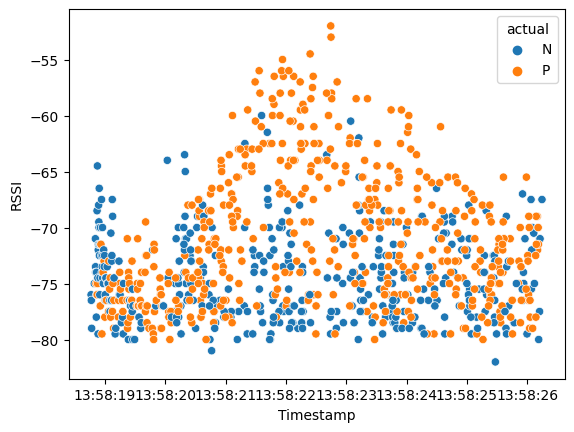

In [168]:
# Graphe RSSI en fonction du temps
sns.scatterplot(x="Timestamp", y="RSSI", data=tags, hue="actual")

In [169]:
tags["Antenna coverage"] = tags["Antenna"].apply(lambda x: "In" if x in [3, 4] else "Out")
tags

,Timestamp,EPC,Antenna,RSSI,actual,Antenna coverage
0,2024-12-13 13:58:18.771874+01:00,000000100000017450404665,1,-76.0,N,Out
1,2024-12-13 13:58:20.047636+01:00,000000100000017450404665,3,-74.5,N,In
2,2024-12-13 13:58:21.309841+01:00,000000100000017450404665,3,-77.0,N,In
3,2024-12-13 13:58:22.711631+01:00,000000100000017450404665,3,-70.5,N,In
4,2024-12-13 13:58:24.021113+01:00,000000100000017450404665,1,-76.0,N,Out
...,...,...,...,...,...,...
897,2024-12-13 13:58:24.290915+01:00,000000100000017450401479,4,-79.5,N,In
898,2024-12-13 13:58:23.761544+01:00,0000001000000174504026DE,3,-77.0,N,In
899,2024-12-13 13:58:23.774646+01:00,000000100000017450394368,3,-76.5,N,In
900,2024-12-13 13:58:24.043776+01:00,0000001000000174503959F0,1,-79.0,N,Out


<Axes: xlabel='Timestamp', ylabel='RSSI'>

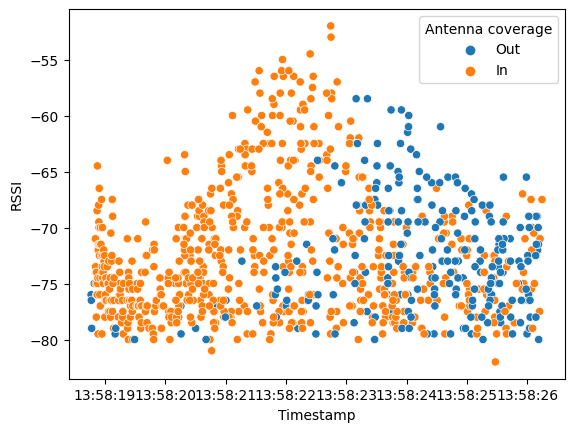

In [170]:
sns.scatterplot(x="Timestamp", y="RSSI", data=tags, hue="Antenna coverage")

In [171]:
tags.groupby(["actual", "Antenna coverage"])

for (actual, antenna_coverage), tags_key in tags.groupby(["actual", "Antenna coverage"]):
    print(actual, antenna_coverage)
    print(tags_key)

N In
                           Timestamp                       EPC  Antenna  RSSI   
1   2024-12-13 13:58:20.047636+01:00  000000100000017450404665        3 -74.5  \
2   2024-12-13 13:58:21.309841+01:00  000000100000017450404665        3 -77.0   
3   2024-12-13 13:58:22.711631+01:00  000000100000017450404665        3 -70.5   
5   2024-12-13 13:58:25.327385+01:00  000000100000017450404665        4 -76.0   
7   2024-12-13 13:58:20.035258+01:00  0000001000000174504052E2        3 -64.0   
..                               ...                       ...      ...   ...   
896 2024-12-13 13:58:22.276104+01:00  000000100000017450401479        3 -79.0   
897 2024-12-13 13:58:24.290915+01:00  000000100000017450401479        4 -79.5   
898 2024-12-13 13:58:23.761544+01:00  0000001000000174504026DE        3 -77.0   
899 2024-12-13 13:58:23.774646+01:00  000000100000017450394368        3 -76.5   
901 2024-12-13 13:58:25.630877+01:00  0000001000000174503959F0        3 -77.5   

    actual Antenna cov

In [172]:
marker_dict = {"P": "o", "N": "+"}
color_dict = {"In": "blue", "Out": "red"}

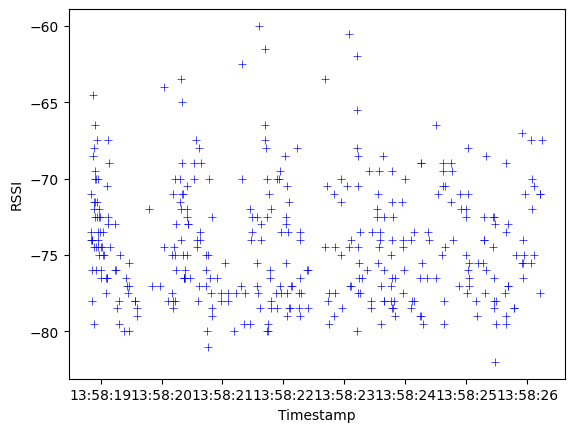

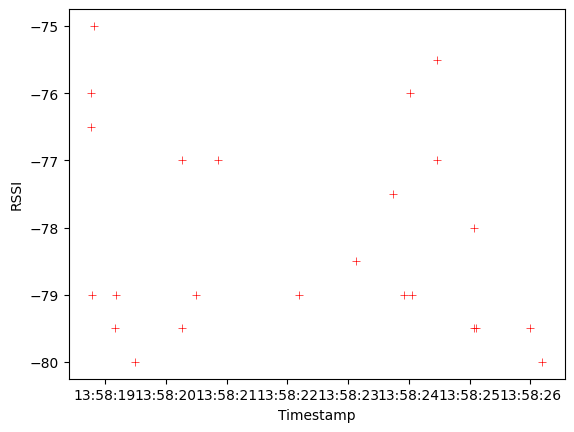

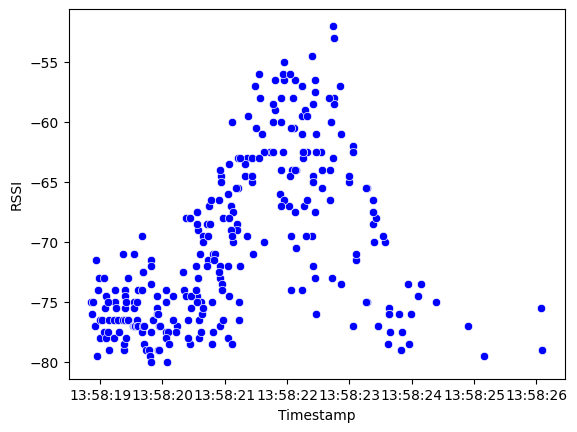

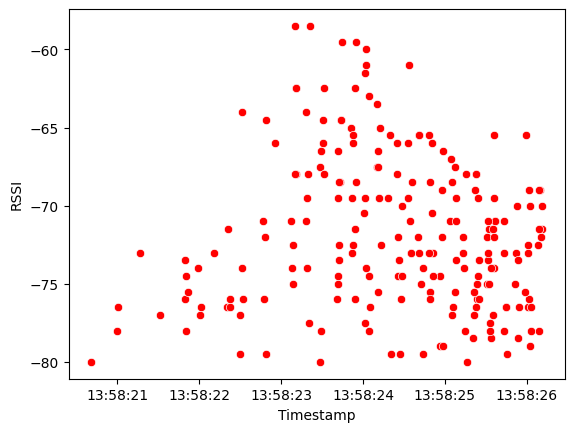

In [173]:
tags.groupby(["actual", "Antenna coverage"])

for (actual, antenna_coverage), tags_key in tags.groupby(["actual", "Antenna coverage"]):
    c = color_dict[antenna_coverage]
    m = marker_dict[actual]

    sns.scatterplot(x="Timestamp", y="RSSI", data=tags_key, color=c, marker=m)
    plt.show()

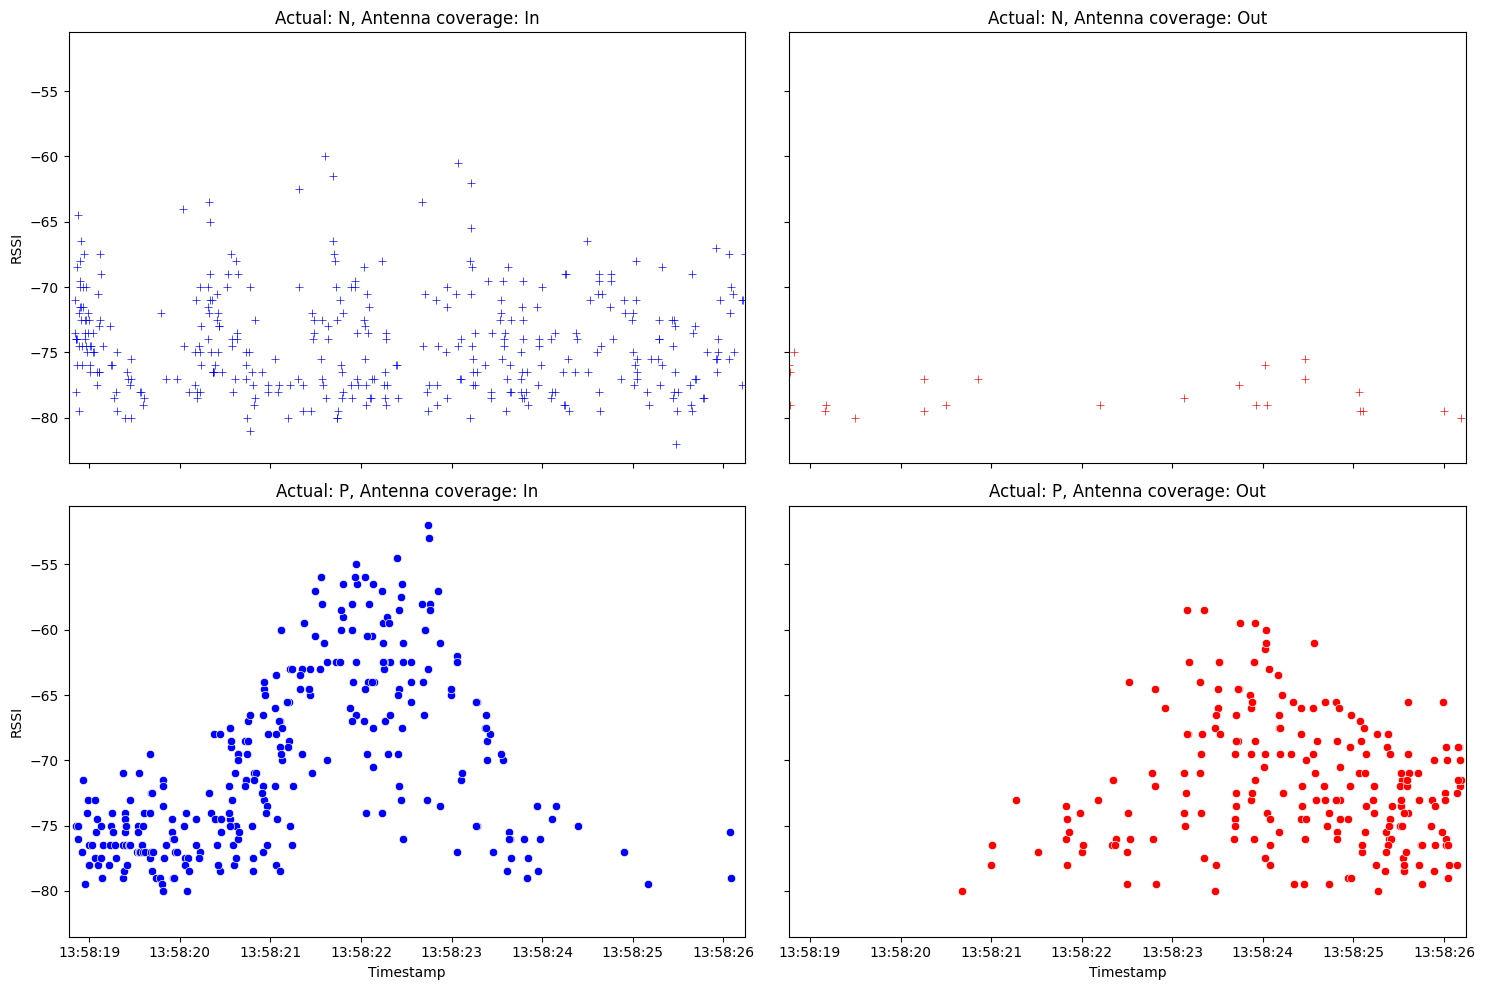

In [174]:
# Définir le nombre de lignes et de colonnes pour la grille
n_rows = 2
n_cols = 2

# Créer une figure et une grille de sous-graphiques
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10), sharex=True, sharey=True)

# Aplatir les axes pour un accès plus facile
axes = axes.flatten()

# Définir les limites de l'axe x
tmin = tags["Timestamp"].min()
tmax = tags["Timestamp"].max()

# Parcourir les groupes et tracer les graphiques
for i, ((actual, antenna_coverage), tags_key) in enumerate(tags.groupby(["actual", "Antenna coverage"])):
    c = color_dict[antenna_coverage]
    m = marker_dict[actual]

    ax = axes[i]
    ax.set_xlim(tmin, tmax)
    sns.scatterplot(x="Timestamp", y="RSSI", data=tags_key, color=c, marker=m, ax=ax)
    ax.set_title(f'Actual: {actual}, Antenna coverage: {antenna_coverage}')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

In [175]:
tags.head()

,Timestamp,EPC,Antenna,RSSI,actual,Antenna coverage
0,2024-12-13 13:58:18.771874+01:00,000000100000017450404665,1,-76.0,N,Out
1,2024-12-13 13:58:20.047636+01:00,000000100000017450404665,3,-74.5,N,In
2,2024-12-13 13:58:21.309841+01:00,000000100000017450404665,3,-77.0,N,In
3,2024-12-13 13:58:22.711631+01:00,000000100000017450404665,3,-70.5,N,In
4,2024-12-13 13:58:24.021113+01:00,000000100000017450404665,1,-76.0,N,Out


In [176]:
tags.sort_values(by="EPC")

,Timestamp,EPC,Antenna,RSSI,actual,Antenna coverage
378,2024-12-13 13:58:19.143833+01:00,000000100000017450384669,4,-79.0,P,In
380,2024-12-13 13:58:21.840960+01:00,000000100000017450384669,1,-78.0,P,Out
379,2024-12-13 13:58:20.552920+01:00,000000100000017450384669,3,-67.5,P,In
381,2024-12-13 13:58:23.167350+01:00,000000100000017450384669,2,-68.0,P,Out
382,2024-12-13 13:58:24.581318+01:00,000000100000017450384669,2,-73.0,P,Out
...,...,...,...,...,...,...
607,2024-12-13 13:58:19.596088+01:00,0000001000000174518764C3,4,-79.0,N,In
47,2024-12-13 13:58:18.858662+01:00,0000001000000174518765F2,3,-78.0,N,In
49,2024-12-13 13:58:22.842510+01:00,0000001000000174518765F2,3,-77.5,N,In
48,2024-12-13 13:58:21.046663+01:00,0000001000000174518765F2,3,-75.5,N,In


In [177]:
tags.groupby("EPC")["RSSI"].max()

EPC
000000100000017450384669   -67.5
000000100000017450384758   -62.5
000000100000017450384947   -76.5
0000001000000174503853DF   -58.0
000000100000017450385448   -71.5
                            ... 
000000100000017451876265   -64.0
000000100000017451876354   -70.0
0000001000000174518764C3   -77.5
0000001000000174518765F2   -75.5
0000001000000174518766A1   -78.5
Name: RSSI, Length: 191, dtype: float64

# Dataset

In [178]:
ds = tags.groupby("EPC")["RSSI"].max().rename("RSSI max").reset_index(drop=False)
ds

,EPC,RSSI max
0,000000100000017450384669,-67.5
1,000000100000017450384758,-62.5
2,000000100000017450384947,-76.5
3,0000001000000174503853DF,-58.0
4,000000100000017450385448,-71.5
...,...,...
186,000000100000017451876265,-64.0
187,000000100000017451876354,-70.0
188,0000001000000174518764C3,-77.5
189,0000001000000174518765F2,-75.5


In [179]:
ds = pd.merge(ds, Actuals, on=["EPC"], how="inner")
ds

,EPC,RSSI max,actual
0,000000100000017450384669,-67.5,P
1,000000100000017450384758,-62.5,P
2,000000100000017450384947,-76.5,N
3,0000001000000174503853DF,-58.0,P
4,000000100000017450385448,-71.5,P
...,...,...,...
186,000000100000017451876265,-64.0,P
187,000000100000017451876354,-70.0,N
188,0000001000000174518764C3,-77.5,N
189,0000001000000174518765F2,-75.5,N


In [180]:
sns.boxplot

<function seaborn.categorical.boxplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)>

<Axes: xlabel='actual', ylabel='RSSI max'>

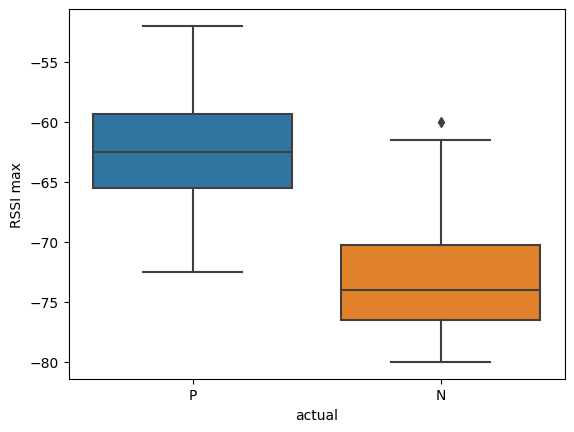

In [181]:
sns.boxplot(x = "actual",y="RSSI max", data=ds)

In [182]:
threshold = -68
crit = ds["RSSI max"] > threshold
crit

0       True
1       True
2      False
3       True
4      False
       ...  
186     True
187    False
188    False
189    False
190    False
Name: RSSI max, Length: 191, dtype: bool

In [183]:
np.where(crit, "P", "N")

array(['P', 'P', 'N', 'P', 'N', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'N', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'N', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'N', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'N', 'P', 'P',
       'N', 'P', 'P', 'P', 'N', 'P', 'N', 'P', 'N', 'P', 'P', 'P', 'N',
       'P', 'P', 'N', 'P', 'P', 'P', 'P', 'P', 'N', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'N', 'P', 'N', 'P',
       'N', 'N', 'N', 'P', 'P', 'P', 'P', 'P', 'P', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'P', 'N', 'P', 'N', 'P', 'P', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'P', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'P', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'P', 'N

In [184]:
ds["pred"] = np.where(crit, "P", "N")
ds

,EPC,RSSI max,actual,pred
0,000000100000017450384669,-67.5,P,P
1,000000100000017450384758,-62.5,P,P
2,000000100000017450384947,-76.5,N,N
3,0000001000000174503853DF,-58.0,P,P
4,000000100000017450385448,-71.5,P,N
...,...,...,...,...
186,000000100000017451876265,-64.0,P,P
187,000000100000017451876354,-70.0,N,N
188,0000001000000174518764C3,-77.5,N,N
189,0000001000000174518765F2,-75.5,N,N


In [185]:
accuracy = (ds["actual"] == ds["pred"]).mean()
accuracy
print("La précision est de {:.2f}%.".format(accuracy * 100))

La précision est de 87.43%.


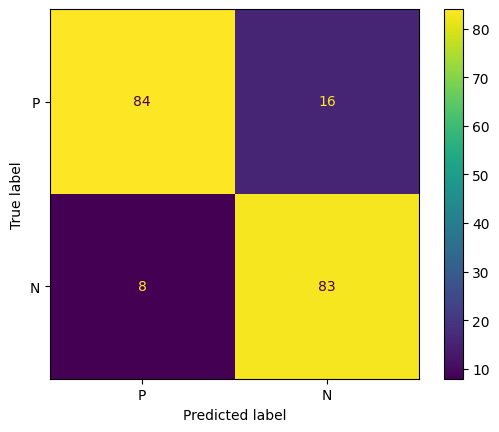

In [186]:
ConfusionMatrixDisplay.from_predictions(ds["actual"], ds["pred"], labels=ds["actual"].unique())

In [ ]:
Classifica.from_predictions(ds["actual"], ds["pred"], labels=ds["actual"].unique())